#### Install and import necessary libraries

In [1]:
!pip install langdetect -q

In [3]:
import pandas as pd
from langdetect import detect, DetectorFactory

In [5]:
DetectorFactory.seed = 0
df = pd.read_csv('netflix_reviews.csv')
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,be07ce27-a4a9-4695-89f9-164acf829516,Rushit Jain,Please give us a speed forward from 0:05x to 0...,3,0,9.22.1 build 3 62948,2025-07-14 10:06:46,9.22.1 build 3 62948
1,4fe808e6-4ddb-4152-bb56-758a10e4cce6,Gaurav Parikh,gauravparikh,5,0,8.4.0 build 12 40035,2025-07-13 04:01:07,8.4.0 build 12 40035
2,d1a75ad8-d1e3-4635-9db4-59ab96802ce1,2Freegamin,horrible company 5.99 pounds a month for a ser...,1,1,9.22.1 build 3 62948,2025-07-10 07:48:48,9.22.1 build 3 62948
3,5a8a2d4c-f887-408e-b13c-f2bc111e409a,Gaurav Parikh,gauravparikh,5,0,8.4.0 build 12 40035,2025-07-05 03:54:48,8.4.0 build 12 40035
4,aa395e07-0b0c-4425-8bcf-2a60e8e5abdb,P,"literally the worse, they make it impossible t...",1,1,9.22.1 build 3 62948,2025-07-04 07:36:39,9.22.1 build 3 62948


#### Defining the language detection function

In [7]:
def detect_language(text):
    """
    Returns the ISO 639-1 language code for the given text.
    If detection fails , returns 'unknown'.
    """
    try:
        return detect(text)
    except:
        return 'unknown'

In [9]:
df['language'] = df['content'].fillna('').apply(detect_language)
print("Language distribution in reviews:")
print(df['language'].value_counts())

Language distribution in reviews:
language
en         128612
so           2012
af           1239
ro            658
unknown       526
id            526
fr            471
it            445
no            410
tl            408
de            404
ca            396
nl            285
pl            271
sl            259
sw            219
es            187
cy            176
et            169
pt            141
sv            127
cs            126
da            110
sk            102
hr             77
lt             74
tr             72
sq             69
fi             68
ar             58
vi             50
hu             43
hi             26
fa             21
bn             19
lv             13
ta             12
th             11
mr             10
kn              9
ur              9
ko              7
ru              6
te              4
ja              3
gu              3
uk              2
bg              1
zh-cn           1
ne              1
he              1
ml              1
el              1
Nam

In [25]:
# Calculate language percentages in df

total_reviews = len(df)
english_count = (df['language'] == 'en').sum()
nonenglish_count = total_reviews - english_count

english_pct = english_count / total_reviews * 100
nonenglish_pct = nonenglish_count / total_reviews * 100

print(f"English reviews    : {english_count} ({english_pct:.2f}%)")
print(f"Non-English reviews: {nonenglish_count} ({nonenglish_pct:.2f}%)")

English reviews    : 128612 (92.56%)
Non-English reviews: 10339 (7.44%)


In [29]:
!pip install wordcloud nltk -q

In [31]:
import nltk
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

#### Data Preprocessing

In [37]:
# Filter only English reviews
df = df[df['language'] == 'en'].copy()
df.shape

(128612, 9)

In [39]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,language
0,be07ce27-a4a9-4695-89f9-164acf829516,Rushit Jain,Please give us a speed forward from 0:05x to 0...,3,0,9.22.1 build 3 62948,2025-07-14 10:06:46,9.22.1 build 3 62948,en
2,d1a75ad8-d1e3-4635-9db4-59ab96802ce1,2Freegamin,horrible company 5.99 pounds a month for a ser...,1,1,9.22.1 build 3 62948,2025-07-10 07:48:48,9.22.1 build 3 62948,en
4,aa395e07-0b0c-4425-8bcf-2a60e8e5abdb,P,"literally the worse, they make it impossible t...",1,1,9.22.1 build 3 62948,2025-07-04 07:36:39,9.22.1 build 3 62948,en
6,9a8bc879-b223-4dda-acc0-7dda595bc622,Kory BlackBuzzardBlvdMusic Knight,Take away the stupid household feature. someth...,3,0,9.21.0 build 5 62896,2025-06-30 04:19:52,9.21.0 build 5 62896,en
8,152b237f-d43b-4958-afac-d62964df1b12,Paweł Ciechański,"was banned from service for no reason, it does...",1,0,9.20.0 build 8 62860,2025-06-27 11:15:56,9.20.0 build 8 62860,en


In [48]:
# Text cleaning function
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\b\d+[:.]\d+(?:x)?\b', ' ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\b', ' ', text)
    text = re.sub(r'http\S+', ' ', text)           # remove URLs
    text = re.sub(r'<.*?>', ' ', text)             # remove HTML tags
    text = re.sub(r'[^a-z\s]', ' ', text)          # keep letters and spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize and drop stopwords
    tokens = text.split()                          
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    return ' '.join(tokens)

df['cleaned'] = df['content'].apply(clean_text)
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,language,cleaned
0,be07ce27-a4a9-4695-89f9-164acf829516,Rushit Jain,Please give us a speed forward from 0:05x to 0...,3,0,9.22.1 build 3 62948,2025-07-14 10:06:46,9.22.1 build 3 62948,en,please give us speed forward according choose ...
2,d1a75ad8-d1e3-4635-9db4-59ab96802ce1,2Freegamin,horrible company 5.99 pounds a month for a ser...,1,1,9.22.1 build 3 62948,2025-07-10 07:48:48,9.22.1 build 3 62948,en,horrible company pounds month service bloody a...
4,aa395e07-0b0c-4425-8bcf-2a60e8e5abdb,P,"literally the worse, they make it impossible t...",1,1,9.22.1 build 3 62948,2025-07-04 07:36:39,9.22.1 build 3 62948,en,literally worse make impossible exit frustrati...
6,9a8bc879-b223-4dda-acc0-7dda595bc622,Kory BlackBuzzardBlvdMusic Knight,Take away the stupid household feature. someth...,3,0,9.21.0 build 5 62896,2025-06-30 04:19:52,9.21.0 build 5 62896,en,take away stupid household feature somethings ...
8,152b237f-d43b-4958-afac-d62964df1b12,Paweł Ciechański,"was banned from service for no reason, it does...",1,0,9.20.0 build 8 62860,2025-06-27 11:15:56,9.20.0 build 8 62860,en,banned service reason matter user matter payin...


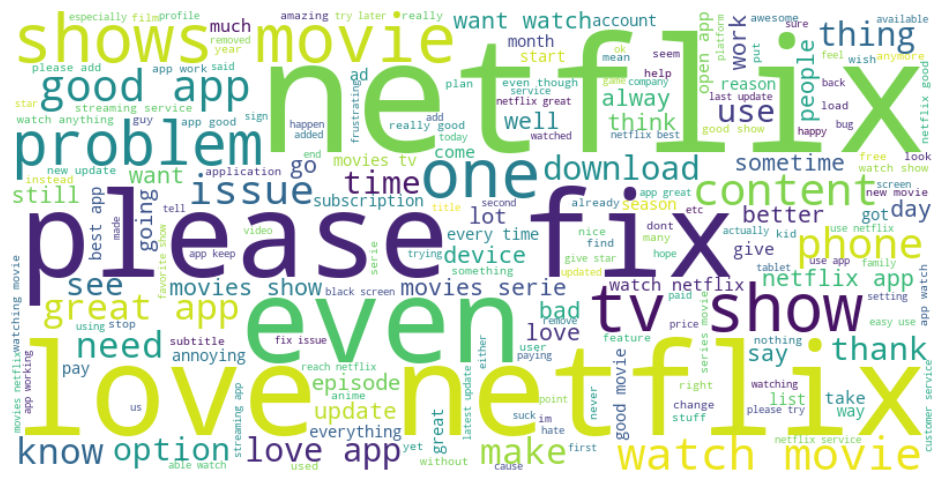

In [50]:
# Generate word cloud
all_text = ' '.join(df['cleaned'])
wc = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Q2 - Part 4

In [53]:
!pip install vaderSentiment matplotlib -q

In [55]:
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [57]:
nltk.download('vader_lexicon')
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...


In [59]:
# Parse timestamps and extract year
df['at'] = pd.to_datetime(df['at'])
df['year'] = df['at'].dt.year

In [75]:
# Initialize
analyzer = SentimentIntensityAnalyzer()

# Function to bucket a compound score
def label_sentiment(compound_score):
    if compound_score >=  0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['compound']  = df['cleaned'].apply(lambda txt: analyzer.polarity_scores(txt)['compound'])
df['sentiment'] = df['compound'].apply(label_sentiment)

In [76]:
yearly_sentiment = (
    df.groupby(['year','sentiment'])
      .size()
      .unstack(fill_value=0)                    
)

yearly_pct = yearly_sentiment.div(yearly_sentiment.sum(axis=1), axis=0) * 100

In [79]:
print(yearly_sentiment)

sentiment  negative  neutral  positive
year                                  
2018            964      571      3254
2019           3562     1629     11648
2020           6017     2823     19658
2021           4242     1975     11469
2022           4034     1612      9448
2023           4082     1471      7246
2024           6543     4122     11493
2025           2626     2113      6010


In [81]:
print(yearly_pct)

sentiment   negative    neutral   positive
year                                      
2018       20.129463  11.923157  67.947379
2019       21.153275   9.673971  69.172754
2020       21.113762   9.905958  68.980279
2021       23.985073  11.167025  64.847902
2022       26.725851  10.679740  62.594408
2023       31.893117  11.493085  56.613798
2024       29.528838  18.602762  51.868400
2025       24.430180  19.657643  55.912178


In [83]:
years = yearly_pct.index

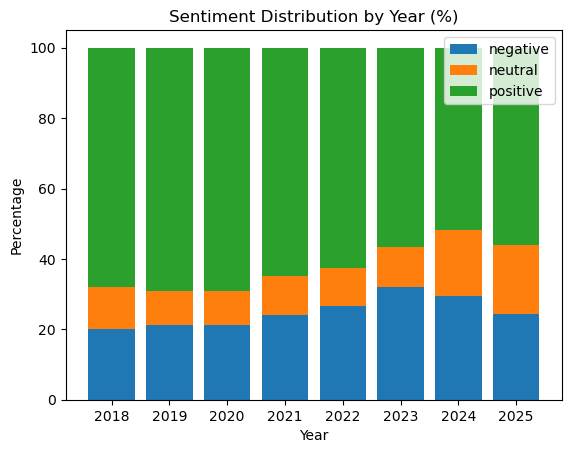

In [85]:
# Stacked bar chart of sentiment percentages
fig, ax = plt.subplots()
bottom = np.zeros(len(years))
for sentiment in yearly_pct.columns:
    ax.bar(years, yearly_pct[sentiment], bottom=bottom, label=sentiment)
    bottom += yearly_pct[sentiment]
ax.set_title('Sentiment Distribution by Year (%)')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_xticks(years)
ax.legend()
plt.show()

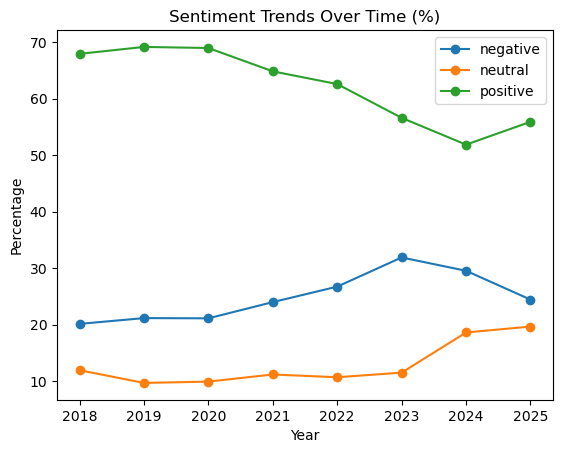

In [87]:
# Line chart of sentiment trends
fig, ax = plt.subplots()
for sentiment in yearly_pct.columns:
    ax.plot(years, yearly_pct[sentiment], marker='o', label=sentiment)
ax.set_title('Sentiment Trends Over Time (%)')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_xticks(years)
ax.legend()
plt.show()

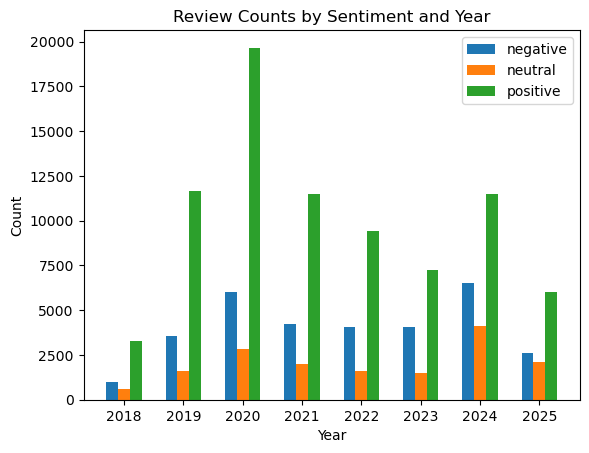

In [89]:
# Grouped bar chart of raw counts
fig, ax = plt.subplots()
width = 0.2
x = np.arange(len(years))
for i, sentiment in enumerate(yearly_sentiment.columns):
    ax.bar(x + i*width, yearly_sentiment[sentiment], width, label=sentiment)
ax.set_title('Review Counts by Sentiment and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_xticks(x + width)
ax.set_xticklabels(years)
ax.legend()
plt.show()